# https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from networkx.drawing.nx_pydot import write_dot
from networkx.linalg.graphmatrix import *
from networkx.algorithms.approximation import *
#from networkx.centrality import closn
from networkx.algorithms import *
import gc
gc.collect()


21

In [2]:
#input = pd.read_csv("/home/abhishek/Graph/titanic.csv")
#input = pd.read_csv("/home/abhishek/Graph/iris.csv")
input = pd.read_csv("/home/abhishek/Graph/Metro_Interstate_Traffic_Volume.csv")

In [3]:
input.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
del(input["traffic_volume"])
print(input["date_time"][0])
#input[] = input["date_time"].str.slice(0,4)
input['Month'] = input["date_time"].str.slice(5,7)
input['day'] = input["date_time"].str.slice(8,10)
input['Hour'] = input["date_time"].str.slice(11,13)

2012-10-02 09:00:00


In [5]:
del(input['date_time'])
#input["traffic_volume_1"] = input["traffic_volume"]
#del(input["traffic_volume"])
#input["traffic_volume"] = input["traffic_volume_1"]
#del(input["traffic_volume_1"])

In [6]:
print(set(input["holiday"]))
input.loc[input['holiday'] == 'Christmas Day','holiday'] = '1'
input.loc[input['holiday'] == 'Columbus Day','holiday'] = '2'
input.loc[input['holiday'] == 'Independence Day','holiday'] = '3'
input.loc[input['holiday'] == 'Labor Day','holiday'] = '4'
input.loc[input['holiday'] == 'Martin Luther King Jr Day','holiday'] = '4'
input.loc[input['holiday'] == 'Memorial Day','holiday'] = '6'
input.loc[input['holiday'] == 'New Years Day','holiday'] = '7'
input.loc[input['holiday'] == 'None','holiday'] = '0'
input.loc[input['holiday'] == 'State Fair','holiday'] = '8'
input.loc[input['holiday'] == 'Thanksgiving Day','holiday'] = '9'
input.loc[input['holiday'] == 'Veterans Day','holiday'] = '10'
input.loc[input['holiday'] == 'Washingtons Birthday','holiday'] = '11'
print(set(input["holiday"]))

{'Thanksgiving Day', 'New Years Day', 'Columbus Day', 'Martin Luther King Jr Day', 'Christmas Day', 'State Fair', 'None', 'Memorial Day', 'Washingtons Birthday', 'Veterans Day', 'Labor Day', 'Independence Day'}
{'0', '4', '2', '3', '9', '11', '8', '6', '10', '1', '7'}


In [7]:
print(set(input["weather_main"]))
input.loc[input['weather_main'] == 'Fog','weather_main'] = '0'
input.loc[input['weather_main'] == 'Drizzle','weather_main'] = '1'
input.loc[input['weather_main'] == 'Squall','weather_main'] = '2'
input.loc[input['weather_main'] == 'Smoke','weather_main'] = '3'
input.loc[input['weather_main'] == 'Clear','weather_main'] = '4'
input.loc[input['weather_main'] == 'Mist','weather_main'] = '4'
input.loc[input['weather_main'] == 'Rain','weather_main'] = '6'
input.loc[input['weather_main'] == 'Clouds','weather_main'] = '7'
input.loc[input['weather_main'] == 'Thunderstorm','weather_main'] = '8'
input.loc[input['weather_main'] == 'Snow','weather_main'] = '9'
input.loc[input['weather_main'] == 'Haze','weather_main'] = '10'
print(set(input["weather_main"]))

{'Mist', 'Drizzle', 'Snow', 'Rain', 'Smoke', 'Fog', 'Clear', 'Squall', 'Clouds', 'Haze', 'Thunderstorm'}
{'0', '4', '2', '3', '9', '8', '6', '10', '1', '7'}


In [8]:
print(set(input["weather_description"]))
input.loc[input['weather_description'] == 'SQUALLS', 'weather_description'] = '0'
input.loc[input['weather_description'] == 'Sky is Clear', 'weather_description'] = '1'
input.loc[input['weather_description'] == 'broken clouds', 'weather_description'] = '2'
input.loc[input['weather_description'] == 'drizzle', 'weather_description'] = '3'
input.loc[input['weather_description'] == 'few clouds', 'weather_description'] = '4'
input.loc[input['weather_description'] == 'fog', 'weather_description'] = '5'
input.loc[input['weather_description'] == 'freezing rain', 'weather_description'] = '6'
input.loc[input['weather_description'] == 'haze', 'weather_description'] = '7'
input.loc[input['weather_description'] == 'heavy intensity drizzle', 'weather_description'] = '8'
input.loc[input['weather_description'] == 'heavy intensity rain', 'weather_description'] = '9'
input.loc[input['weather_description'] == 'heavy snow', 'weather_description'] = '10'
input.loc[input['weather_description'] == 'light intensity drizzle','weather_description'] = '11'
input.loc[input['weather_description'] == 'light intensity shower rain', 'weather_description'] = '12'
input.loc[input['weather_description'] == 'light rain', 'weather_description'] = '13'
input.loc[input['weather_description'] == 'light rain and snow', 'weather_description'] = '14'
input.loc[input['weather_description'] == 'light shower snow', 'weather_description'] = '15'
input.loc[input['weather_description'] == 'light snow', 'weather_description'] = '16'
input.loc[input['weather_description'] == 'mist', 'weather_description'] = '17'
input.loc[input['weather_description'] == 'moderate rain', 'weather_description'] = '18'
input.loc[input['weather_description'] == 'overcast clouds', 'weather_description'] = '19'
input.loc[input['weather_description'] == 'proximity shower rain', 'weather_description'] = '20'
input.loc[input['weather_description'] == 'proximity thunderstorm', 'weather_description'] = '21'
input.loc[input['weather_description'] == 'proximity thunderstorm with drizzle', 'weather_description'] = '22'
input.loc[input['weather_description'] == 'proximity thunderstorm with rain', 'weather_description'] = '23'
input.loc[input['weather_description'] == 'scattered clouds', 'weather_description'] = '24'
input.loc[input['weather_description'] == 'shower drizzle', 'weather_description'] = '25'
input.loc[input['weather_description'] == 'shower snow', 'weather_description'] = '26'
input.loc[input['weather_description'] == 'sky is clear', 'weather_description'] = '27'
input.loc[input['weather_description'] == 'sleet', 'weather_description'] = '28'
input.loc[input['weather_description'] == 'smoke', 'weather_description'] = '29'
input.loc[input['weather_description'] == 'snow', 'weather_description'] = '30'
input.loc[input['weather_description'] == 'thunderstorm', 'weather_description'] = '31'
input.loc[input['weather_description'] == 'thunderstorm with drizzle', 'weather_description'] = '32'
input.loc[input['weather_description'] == 'thunderstorm with heavy rain', 'weather_description'] = '33'
input.loc[input['weather_description'] == 'thunderstorm with light drizzle', 'weather_description'] = '34'
input.loc[input['weather_description'] == 'thunderstorm with light rain', 'weather_description'] = '35'
input.loc[input['weather_description'] == 'thunderstorm with rain', 'weather_description'] = '36'
input.loc[input['weather_description'] == 'very heavy rain' ,'weather_description'] = '37'

print(set(input["weather_description"]))

{'overcast clouds', 'freezing rain', 'light rain and snow', 'thunderstorm with light rain', 'light snow', 'light shower snow', 'thunderstorm with light drizzle', 'proximity thunderstorm', 'light intensity drizzle', 'proximity thunderstorm with drizzle', 'haze', 'thunderstorm with heavy rain', 'fog', 'drizzle', 'proximity thunderstorm with rain', 'sleet', 'heavy intensity drizzle', 'thunderstorm with drizzle', 'heavy snow', 'proximity shower rain', 'broken clouds', 'snow', 'smoke', 'heavy intensity rain', 'light rain', 'thunderstorm with rain', 'sky is clear', 'shower drizzle', 'SQUALLS', 'few clouds', 'thunderstorm', 'very heavy rain', 'mist', 'light intensity shower rain', 'scattered clouds', 'Sky is Clear', 'shower snow', 'moderate rain'}
{'0', '9', '22', '37', '25', '8', '36', '20', '13', '14', '7', '5', '4', '35', '19', '30', '12', '31', '29', '32', '15', '24', '17', '1', '3', '2', '21', '26', '34', '23', '28', '10', '27', '16', '11', '6', '18', '33'}


In [9]:
total_rows=len(input.axes[0])
total_cols=len(input.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print("Max of connection in graph: "+str(total_rows*total_cols))
input.describe()

Number of Rows: 48204
Number of Columns: 10
Max of connection in graph: 482040


,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231
std,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000
50%,282.450000,0.000000,0.000000,64.000000
75%,291.806000,0.000000,0.000000,90.000000
max,310.070000,9831.300000,0.510000,100.000000


In [10]:
input['temp_level'] = pd.qcut(input['temp'], q=4, labels=(1,2,3,4))
#iris['snow_1h_level'] = pd.qcut(iris['snow_1h'], q=10, labels=(1,2,3,4,5,6,7,8,9,10))
input['clouds_all_level'] = pd.qcut(input['clouds_all'], q=4, labels=(1,2,3,4))
del(input['temp'])
del(input['rain_1h'])
del(input['snow_1h'])
del(input['clouds_all'])

In [11]:
#input(input)
input.head(5) 

,holiday,weather_main,weather_description,Month,day,Hour,temp_level,clouds_all_level
0,0,7,24,10,02,09,3,2
1,0,7,2,10,02,10,3,3
2,0,7,19,10,02,11,3,3
3,0,7,19,10,02,12,3,3
4,0,7,2,10,02,13,3,3


In [12]:
#input = Survived_0
input.shape

(48204, 8)

In [13]:
'''input['Age_prect_10'] = pd.qcut(input['Age'], q=4)
input['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))

input['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)
input['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))

input.loc[input['Sex'] == 'male', 'sex'] = '1'
input.loc[input['Sex'] == 'female', 'sex'] = '0'
#input.head(5)'''

"input['Age_prect_10'] = pd.qcut(input['Age'], q=4)\ninput['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))\n\ninput['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)\ninput['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))\n\ninput.loc[input['Sex'] == 'male', 'sex'] = '1'\ninput.loc[input['Sex'] == 'female', 'sex'] = '0'\n#input.head(5)"

In [14]:
#drop un-use column
'''del input['Fare']
del input['Age'] 
del input['Age_prect_10'] 
del input['Fare_prect_10'] 
del input['Sex']''' 
input.head(5)

,holiday,weather_main,weather_description,Month,day,Hour,temp_level,clouds_all_level
0,0,7,24,10,02,09,3,2
1,0,7,2,10,02,10,3,3
2,0,7,19,10,02,11,3,3
3,0,7,19,10,02,12,3,3
4,0,7,2,10,02,13,3,3


In [15]:
input.columns

Index(['holiday', 'weather_main', 'weather_description', 'Month', 'day',
       'Hour', 'temp_level', 'clouds_all_level'],
      dtype='object')

In [16]:
def create_graph_data(input):
    another_input_list = []
    count = 0
    for i in range(len(input.axes[1])-1): #range(len(input.axes[1])-1)
        if len(input.axes[1]) > i :
            current_col = input.axes[1][i]
            next_col = input.axes[1][i+1]

            for j in range(len(input.axes[0])):
                item = str(input.axes[1][i])+'_'+str(input[current_col][j]),str(input.axes[1][i+1])+'_'+str(input[next_col][j]),input[next_col][j]
                another_input_list.append(item)
                count = count + j
            #
            #print(next_col,len(input.axes[1]),i,j)
        else:
            print("end")

    #print('number of combination of edge (%d)' % (count))
    
    return another_input_list

In [17]:
def graph_create(another_input_list):
    
    MG_1 = nx.DiGraph()
    MG_1.add_weighted_edges_from(another_input_list)
    pos = nx.nx_agraph.graphviz_layout(MG_1)
    nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
    plt.axis("Off")
    plt.show()
    print(MG_1.nodes())
    print('Number of edges',MG_1.number_of_edges())
    print('Number of Nodes',MG_1.number_of_nodes())
    return MG_1

# this code will print nice graph

In [18]:
#### this code will print nice graph
#MG_1 = graph_create(another_input_list)
#nx.nx_agraph.view_pygraphviz(MG_1)

In [19]:
def column_arrange (col_name,edge_impotance_order):
    col_name = list(col_name)
    temp = list(edge_impotance_order)[0].rpartition('_')[0]
    print('High ranked column ---->',temp)
    #print('\nOld column name order\n',col_name)
    col_name.remove(temp)
    col_name.insert(0,temp)
    #print('\nNew column name order\n',col_name)
    
    return list(col_name),temp
    #edge_impotance_order.keys()
    #google_PGR_O = google_matrix(MG_1, alpha=0.9)
    #google_PGR_O

In [20]:
def variable_imp (another_input_list):
    
    ################
    # approach-1    
    ################
    print("\nDiGraph")
    MG_1 = graph_create(another_input_list)
    edge_impotance_weight = {}
    edge_impotance_order = {}
    W=MG_1.edges.data('weight', default=1)
    count = 1
    while (MG_1.number_of_nodes() > 0):
        '''
        pos = nx.nx_agraph.graphviz_layout(MG_1)
        nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
        plt.axis("Off")
        plt.show()
        '''
        PGR_O = nx.pagerank(MG_1, alpha=0.90,max_iter=100, weight=W) 
        # , nstart=W this could be the start value of each node
        #type(PGR_O)
        #print(max(PGR_O.keys()))
        #print(round(max(PGR_O.values()),5))  # maximum rank of the node

        for key, value in PGR_O.items():
            if round(value,5) == round(max(PGR_O.values()),5):
                #print('Edge name -> ',key, '->', round(value,5))
                edge_impotance_weight.update({key:round(value,5)})
                edge_impotance_order.update({key:count})
                MG_1.remove_node(key)
                count = count + 1
                #print('Number of edge',MG_1.number_of_edges(key))

    return edge_impotance_weight,edge_impotance_order

# Run one time with default order of column

In [21]:
# Run one time with default order of column
col_name = input.columns
input = input.reindex(columns=col_name)
input.head(5)
#another_input_list = create_graph_data(input)
#another_input_list[0:5]

,holiday,weather_main,weather_description,Month,day,Hour,temp_level,clouds_all_level
0,0,7,24,10,02,09,3,2
1,0,7,2,10,02,10,3,3
2,0,7,19,10,02,11,3,3
3,0,7,19,10,02,12,3,3
4,0,7,2,10,02,13,3,3


In [22]:
#another_input_list = create_graph_data(input)

# create graph and node important for data set
#edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)


DiGraph


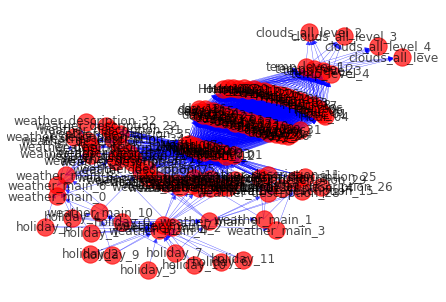

['holiday_0', 'weather_main_7', 'weather_main_4', 'holiday_2', 'weather_main_6', 'weather_main_1', 'weather_main_10', 'weather_main_0', 'weather_main_8', 'weather_main_9', 'holiday_10', 'holiday_9', 'holiday_1', 'holiday_7', 'holiday_11', 'weather_main_2', 'holiday_6', 'holiday_3', 'holiday_8', 'holiday_4', 'weather_main_3', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather_description_33', 'weather_description_6', 'weather_description_26', 'weather_description_14', 'weather_description_12', 'weather_description_0', 'weath

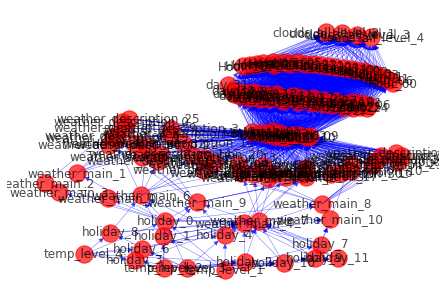

['temp_level_3', 'holiday_0', 'temp_level_4', 'temp_level_2', 'holiday_2', 'temp_level_1', 'holiday_10', 'holiday_9', 'holiday_1', 'holiday_7', 'holiday_11', 'holiday_6', 'holiday_3', 'holiday_8', 'holiday_4', 'weather_main_7', 'weather_main_4', 'weather_main_6', 'weather_main_1', 'weather_main_10', 'weather_main_0', 'weather_main_8', 'weather_main_9', 'weather_main_2', 'weather_main_3', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather_description_33', 'weather_description_6', 'weather_description_26', 'weather_descriptio

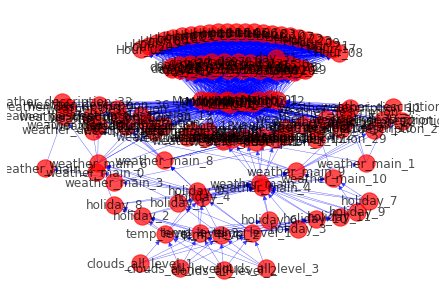

['clouds_all_level_2', 'temp_level_3', 'clouds_all_level_3', 'clouds_all_level_1', 'temp_level_4', 'temp_level_2', 'temp_level_1', 'clouds_all_level_4', 'holiday_0', 'holiday_2', 'holiday_10', 'holiday_9', 'holiday_1', 'holiday_7', 'holiday_11', 'holiday_6', 'holiday_3', 'holiday_8', 'holiday_4', 'weather_main_7', 'weather_main_4', 'weather_main_6', 'weather_main_1', 'weather_main_10', 'weather_main_0', 'weather_main_8', 'weather_main_9', 'weather_main_2', 'weather_main_3', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather

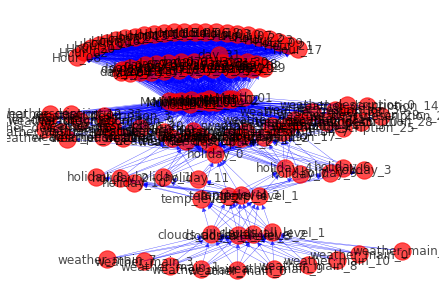

['weather_main_7', 'clouds_all_level_2', 'clouds_all_level_3', 'weather_main_4', 'clouds_all_level_1', 'weather_main_6', 'clouds_all_level_4', 'weather_main_1', 'weather_main_10', 'weather_main_0', 'weather_main_8', 'weather_main_9', 'weather_main_2', 'weather_main_3', 'temp_level_3', 'temp_level_4', 'temp_level_2', 'temp_level_1', 'holiday_0', 'holiday_2', 'holiday_10', 'holiday_9', 'holiday_1', 'holiday_7', 'holiday_11', 'holiday_6', 'holiday_3', 'holiday_8', 'holiday_4', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather

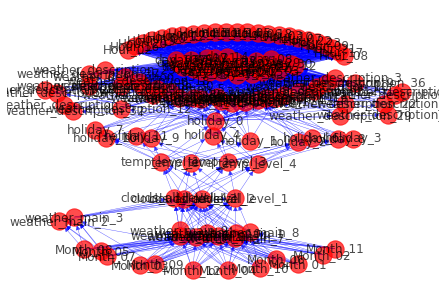

['Month_10', 'weather_main_7', 'weather_main_4', 'weather_main_6', 'weather_main_1', 'weather_main_10', 'weather_main_0', 'weather_main_8', 'weather_main_9', 'Month_11', 'Month_12', 'Month_01', 'Month_02', 'Month_03', 'Month_04', 'Month_05', 'weather_main_2', 'Month_06', 'Month_07', 'Month_08', 'Month_09', 'weather_main_3', 'clouds_all_level_2', 'clouds_all_level_3', 'clouds_all_level_1', 'clouds_all_level_4', 'temp_level_3', 'temp_level_4', 'temp_level_2', 'temp_level_1', 'holiday_0', 'holiday_2', 'holiday_10', 'holiday_9', 'holiday_1', 'holiday_7', 'holiday_11', 'holiday_6', 'holiday_3', 'holiday_8', 'holiday_4', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_descriptio

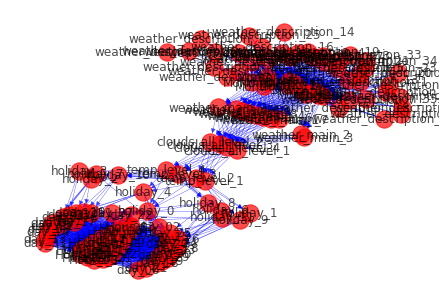

['weather_description_24', 'Month_10', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'Month_11', 'weather_description_8', 'weather_description_30', 'weather_description_33', 'Month_12', 'Month_01', 'Month_02', 'weather_description_6', 'Month_03', 'weather_description_26', 'Month_04', 'weather_description_14', 'weather_description_12', 'Month_05', 'weather_description_0', 'weather_description_36', 'weather_description_22', 'Month_06', 'weather_description_31', 'weather_description_1', 'weather_description_37', 'weather_description_34', 'Month_07', 'Month_08', 'Month_09', 'weather_description_16', 'weathe

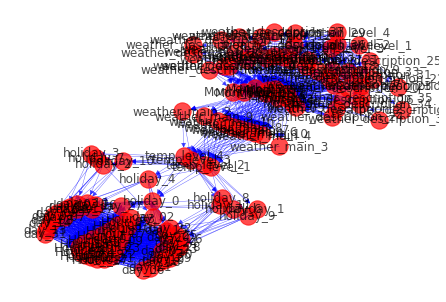

['clouds_all_level_2', 'weather_description_24', 'clouds_all_level_3', 'weather_description_2', 'weather_description_19', 'clouds_all_level_1', 'weather_description_27', 'weather_description_4', 'clouds_all_level_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather_description_33', 'weather_description_6', 'weather_description_26', 'weather_description_14', 'weather_description_12', 'weather_description_0', 'weather_description_36', 'weather_description_22', 'weather_description_31', 'weather_description_1', 'weather_description_37', 'weather_description_34', 'weather_description_16', 'weather_description_32', 'weather_description_29', 'weather_de

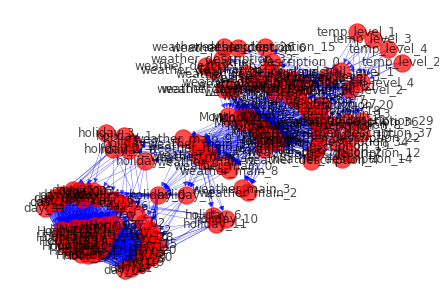

['temp_level_3', 'clouds_all_level_2', 'clouds_all_level_3', 'clouds_all_level_1', 'temp_level_4', 'temp_level_2', 'temp_level_1', 'clouds_all_level_4', 'weather_description_24', 'weather_description_2', 'weather_description_19', 'weather_description_27', 'weather_description_4', 'weather_description_13', 'weather_description_11', 'weather_description_17', 'weather_description_7', 'weather_description_5', 'weather_description_20', 'weather_description_3', 'weather_description_18', 'weather_description_9', 'weather_description_21', 'weather_description_35', 'weather_description_23', 'weather_description_10', 'weather_description_8', 'weather_description_30', 'weather_description_33', 'weather_description_6', 'weather_description_26', 'weather_description_14', 'weather_description_12', 'weather_description_0', 'weather_description_36', 'weather_description_22', 'weather_description_31', 'weather_description_1', 'weather_description_37', 'weather_description_34', 'weather_description_16',

In [23]:
col_count = 0
imp_attribute = []
edge_impotance_order_final = {}
while (col_count < len(input.columns)):
    # create graph dataset
    another_input_list = create_graph_data(input)

    # create graph and node important for data set
    edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)

    # make important node as primary node
    col_name,imp = column_arrange(col_name,edge_impotance_order)
    
    imp_attribute.append(imp)
    
    edge_impotance_order_final.update({col_count:edge_impotance_weight})

    #arrange the data set as per new order
    input = input.reindex(columns=col_name)
    #input.head(5)
    col_count = col_count + 1
    #print(col_count)

In [24]:
imp_attribute

['temp_level',
 'clouds_all_level',
 'weather_main',
 'Month',
 'weather_description',
 'clouds_all_level',
 'temp_level',
 'holiday']

In [25]:
#

In [26]:
test = pd.DataFrame(edge_impotance_order_final)
type(test)

pandas.core.frame.DataFrame

In [27]:
test.shape

(134, 8)

In [28]:
# convert the index into column
#test.reset_index(level=0, inplace=True)
#test["attribute_name"] = test.index
test

,0,1,2,3,4,5,6,7
temp_level_3,0.04576,0.01449,0.02331,0.02147,0.02381,0.01754,0.03025,0.01667
temp_level_4,0.04576,0.01449,0.02331,0.02147,0.02381,0.01754,0.03025,0.01667
temp_level_2,0.04576,0.01449,0.02331,0.02147,0.02381,0.01754,0.05477,0.01667
temp_level_1,0.04576,0.01449,0.02331,0.02147,0.02381,0.01754,0.05477,0.01667
Month_07,0.01775,0.01757,0.01930,0.01813,0.02381,0.02440,0.02652,0.02465
...,...,...,...,...,...,...,...,...
day_01,0.01316,0.01449,0.01449,0.01923,0.02174,0.02216,0.02133,0.01667
clouds_all_level_2,0.01316,0.05358,0.01449,0.02389,0.01732,0.02913,0.06667,0.01960
clouds_all_level_3,0.01316,0.05358,0.01449,0.02389,0.01732,0.02913,0.06667,0.01960
clouds_all_level_1,0.01316,0.05358,0.01449,0.05702,0.04980,0.09331,0.06667,0.01960


In [29]:
#list(test.index).rpartition('_')[0]
#(list(test.index)[3]).find('_')  #rpartition('_')
test['col_name'] = ''
for i in range(len(test.index)):
    test['col_name'][i] = test.index[i].rpartition('_')[0]

<ipython-input-29-5842f937ae9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['col_name'][i] = test.index[i].rpartition('_')[0]


In [30]:
test['min_of_iteration']= test.min(axis=1)
final = pd.DataFrame(test.groupby(['col_name'])['min_of_iteration'].agg('sum'))

In [31]:
final.sort_values('min_of_iteration')

,min_of_iteration
col_name,
clouds_all_level,0.05264
temp_level,0.05796
holiday,0.14476
weather_main,0.16619
Month,0.26034
Hour,0.33792
day,0.40796
weather_description,0.50229


In [32]:
test.to_csv('/home/abhishek/Graph/4_Merto_interstate_Traffic_output.csv', sep=',', encoding='utf-8')